<a href="https://colab.research.google.com/github/aleanaliaaustral-web/labo2025v/blob/main/src/rpart/102_FinalTrain_PruebaClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arbol elemental con libreria  rpart

## Introduccion

Este es el primer notebook/script de la materia Laboratorio de Implementacion I, se expone en la primera clase.
<br>Se utilizan Arboles de Decision, librería **rpart**,  el primer algoritmo, el más simple que utilizaremos en la materia pero que es el fundamento de los Ensembles de Arboles de Decision tales como  Random Forest y  Gradient Boosting of Decision Trees (XGBoost/LightGBM)
<br>La materia posee un dataset con 31 meses, en las primeras clases toda la cohorte, independiente de la modalidad elegida, utilizará **dataset_pequeno** que posee apenas un mes histórico 202107 y obviamente el mes donde se debe realizar la predicción 202109
<br>Este primer notebook/script **no** desarrolla todas las etapas necesarias para la generación de un buen modelo, apenas posee la parte final del pipeline/workflow.

### Limitaciones



Este primer y elemental notebook/script supone estas simplificaciónes:
* Solo se dispone del mes 202107 con el campo clase_ternaria completo, es el unico mes donde entrenar
* Se decidió previamente, de alguna forma, que la etapa de Final Training se hará sobre TODO el dataset de 202107
* Se obtuvieron previamente los hiperparámetros optimos de la libería **rpart** para este problema, mediante algun tipo de busqueda búsqueda.  Esta es la etapa que demandará decenas de horas para quienes opten por la *modalidad Analista Senior*
* No se realiza ningun tipo de feature engineering intra-mes
* Al no disponer de datos históricos no se realiza ningun tipo de feature engineering histórico
* No hay ningun analisis de la calidad de los campos, no se analiza si ocurrió alguna catástrofe ese mes y algun campo no se calculó correctamente
* Noy hay ningun tipo de análisis de Data Drifting entre los meses de 202107 y 202109
* Obedientemente se trabaja utlizando como clase el campo **clase_ternaria** sin ningun tipo de transformacion


<br> Obviamente, a lo largo de la materia se avanzará sobre todas las limitacinoes anteriores.

## Seteo del ambiente en Google Colab

Esta parte se debe correr con el runtime en Python3
<br>Ir al menu, Runtime -> Change Runtime Tipe -> Runtime type ->  **Python 3**

Conectar la virtual machine donde esta corriendo Google Colab con el  Google Drive, para poder tener persistencia de archivos

In [2]:
# primero establecer el Runtime de Python 3
from google.colab import drive
drive.mount('/content/.drive')

Mounted at /content/.drive


Para correr la siguiente celda es fundamental en Arranque en Frio haber copiado el archivo kaggle.json al Google Drive, en la carpeta indicada en el instructivo

<br>los siguientes comando estan en shell script de Linux
*   Crear las carpetas en el Google Drive
*   "instalar" el archivo kaggle.json desde el Google Drive a la virtual machine para que pueda ser utilizado por la libreria  kaggle de Python
*   Bajar el  **dataset_pequeno**  al  Google Drive  y tambien al disco local de la virtual machine que esta corriendo Google Colab



In [3]:
%%shell

mkdir -p "/content/.drive/My Drive/labo1"
mkdir -p "/content/buckets"
ln -s "/content/.drive/My Drive/labo1" /content/buckets/b1

mkdir -p ~/.kaggle
cp /content/buckets/b1/kaggle/kaggle.json  ~/.kaggle
chmod 600 ~/.kaggle/kaggle.json


mkdir -p /content/buckets/b1/exp
mkdir -p /content/buckets/b1/datasets
mkdir -p /content/datasets



archivo_origen="https://storage.googleapis.com/open-courses/austral2025-af91/gridsearch_grupodiez.csv"
archivo_destino="/content/datasets/dataset_pequeno.csv"
archivo_destino_bucket="/content/buckets/b1/datasets/dataset_pequeno.csv"

if ! test -f $archivo_destino_bucket; then
  wget  $archivo_origen  -O $archivo_destino_bucket
fi


if ! test -f $archivo_destino; then
  cp  $archivo_destino_bucket  $archivo_destino
fi


In [5]:
import pandas as pd

# Leer el archivo gridsearch
gridsearch = pd.read_csv('/content/datasets/gridsearch_grupodiez.csv')

# Mostrar información básica
print("=" * 50)
print("INFORMACIÓN DEL ARCHIVO GRIDSEARCH")
print("=" * 50)
print(f"\nDimensiones: {gridsearch.shape[0]} filas x {gridsearch.shape[1]} columnas")
print(f"\nColumnas: {list(gridsearch.columns)}")

# Mostrar las primeras filas
print("\nPrimeras 5 filas:")
print(gridsearch.head())

# Mostrar estadísticas
print("\nEstadísticas descriptivas:")
print(gridsearch.describe())

# Encontrar la mejor configuración
mejor_idx = gridsearch['ganancia_mean'].idxmax()
mejor_config = gridsearch.loc[mejor_idx]

print("\n" + "=" * 50)
print("MEJOR CONFIGURACIÓN ENCONTRADA:")
print("=" * 50)
print(f"cp:           {mejor_config['cp']}")
print(f"maxdepth:     {int(mejor_config['maxdepth'])}")
print(f"minsplit:     {int(mejor_config['minsplit'])}")
print(f"minbucket:    {int(mejor_config['minbucket'])}")
print(f"ganancia_mean: {mejor_config['ganancia_mean']:.2f}")
print("=" * 50)

# Top 10 mejores configuraciones
print("\nTOP 10 MEJORES CONFIGURACIONES:")
top10 = gridsearch.nlargest(10, 'ganancia_mean')
print(top10.to_string(index=False))

# Verificar que el archivo existe y es legible
import os
print(f"\n¿Archivo existe? {os.path.exists('/content/datasets/gridsearch_grupodiez.csv')}")
print(f"Tamaño del archivo: {os.path.getsize('/content/datasets/gridsearch_grupodiez.csv')} bytes")

FileNotFoundError: [Errno 2] No such file or directory: '/content/datasets/gridsearch_grupodiez.csv'

In [7]:
import os

# Buscar el archivo en diferentes ubicaciones
rutas_posibles = [
    '/content/datasets/gridsearch_grupodiez.csv',
    '/content/buckets/b1/datasets/gridsearch_grupodiez.csv',
    '/content/.drive/My Drive/labo1/datasets/gridsearch_grupodiez.csv',
    '/content/.drive/MyDrive/labo1/datasets/gridsearch_grupodiez.csv'
]

print("Buscando el archivo gridsearch_grupodiez.csv...\n")

for ruta in rutas_posibles:
    if os.path.exists(ruta):
        print(f"✅ ENCONTRADO en: {ruta}")
    else:
        print(f"❌ No existe: {ruta}")

# Listar contenido de /content/datasets/
print("\n" + "="*50)
print("Contenido de /content/datasets/:")
print("="*50)
if os.path.exists('/content/datasets/'):
    archivos = os.listdir('/content/datasets/')
    if archivos:
        for archivo in archivos:
            print(f"  - {archivo}")
    else:
        print("  (vacío)")
else:
    print("  (el directorio no existe)")

# Listar contenido de /content/buckets/b1/datasets/
print("\n" + "="*50)
print("Contenido de /content/buckets/b1/datasets/:")
print("="*50)
if os.path.exists('/content/buckets/b1/datasets/'):
    archivos = os.listdir('/content/buckets/b1/datasets/')
    if archivos:
        for archivo in archivos:
            print(f"  - {archivo}")
    else:
        print("  (vacío)")
else:
    print("  (el directorio no existe)")

Buscando el archivo gridsearch_grupodiez.csv...

❌ No existe: /content/datasets/gridsearch_grupodiez.csv
✅ ENCONTRADO en: /content/buckets/b1/datasets/gridsearch_grupodiez.csv
✅ ENCONTRADO en: /content/.drive/My Drive/labo1/datasets/gridsearch_grupodiez.csv
✅ ENCONTRADO en: /content/.drive/MyDrive/labo1/datasets/gridsearch_grupodiez.csv

Contenido de /content/datasets/:
  - dataset_pequeno.csv

Contenido de /content/buckets/b1/datasets/:
  - dataset_pequeno.csv
  - gridsearch_grupodiez.csv
  - Untitled0.ipynb
  - Untitled1.ipynb
  - Untitled


In [9]:
import pandas as pd
import os

# Leer el archivo gridsearch desde la ubicación correcta
gridsearch = pd.read_csv('/content/buckets/b1/datasets/gridsearch_grupodiez.csv')

# Mostrar información básica
print("=" * 50)
print("INFORMACIÓN DEL ARCHIVO GRIDSEARCH")
print("=" * 50)
print(f"\nDimensiones: {gridsearch.shape[0]} filas x {gridsearch.shape[1]} columnas")
print(f"\nColumnas: {list(gridsearch.columns)}")

# Mostrar las primeras filas
print("\nPrimeras 5 filas:")
print(gridsearch.head())

# Mostrar estadísticas
print("\nEstadísticas descriptivas:")
print(gridsearch.describe())

# Encontrar la mejor configuración
mejor_idx = gridsearch['ganancia_mean'].idxmax()
mejor_config = gridsearch.loc[mejor_idx]

print("\n" + "=" * 50)
print("MEJOR CONFIGURACIÓN ENCONTRADA:")
print("=" * 50)
print(f"cp:           {mejor_config['cp']}")
print(f"maxdepth:     {int(mejor_config['maxdepth'])}")
print(f"minsplit:     {int(mejor_config['minsplit'])}")
print(f"minbucket:    {int(mejor_config['minbucket'])}")
print(f"ganancia_mean: {mejor_config['ganancia_mean']:.2f}")
print("=" * 50)

# Top 10 mejores configu

INFORMACIÓN DEL ARCHIVO GRIDSEARCH

Dimensiones: 156 filas x 5 columnas

Columnas: ['cp', 'maxdepth', 'minsplit', 'minbucket', 'ganancia_mean']

Primeras 5 filas:
     cp  maxdepth  minsplit  minbucket  ganancia_mean
0 -0.50        10       400         50     51950000.0
1 -0.40        10       400         50     51950000.0
2 -0.30        10       400         50     51950000.0
3 -0.20        10       400         50     51950000.0
4 -0.01        10       400         50     51950000.0

Estadísticas descriptivas:
               cp    maxdepth     minsplit   minbucket  ganancia_mean
count  156.000000  156.000000   156.000000  156.000000   1.560000e+02
mean    -0.353013    9.833333   502.692308   19.173077   4.698635e+07
std      0.255801    3.519225   390.394914   20.531695   3.304070e+06
min     -1.000000    4.000000    20.000000    1.000000   3.144000e+07
25%     -0.500000    6.000000   100.000000    1.000000   4.527000e+07
50%     -0.300000   10.000000   400.000000   10.000000   4.752000

In [10]:
# Ver cuántas configuraciones tienen la ganancia máxima
ganancia_max = gridsearch['ganancia_mean'].max()
configs_optimas = gridsearch[gridsearch['ganancia_mean'] == ganancia_max]

print(f"\nHay {len(configs_optimas)} configuraciones con la ganancia máxima de {ganancia_max:,.0f}")
print("\nTodas las configuraciones óptimas:")
print(configs_optimas.to_string(index=False))


Hay 5 configuraciones con la ganancia máxima de 51,950,000

Todas las configuraciones óptimas:
   cp  maxdepth  minsplit  minbucket  ganancia_mean
-0.50        10       400         50     51950000.0
-0.40        10       400         50     51950000.0
-0.30        10       400         50     51950000.0
-0.20        10       400         50     51950000.0
-0.01        10       400         50     51950000.0


### Final Training con hiperparámetros óptimos del Grid Search

In [1]:
# Limpio la memoria R
rm(list=ls(all.names=TRUE))
gc(full=TRUE, verbose=FALSE)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,657244,35.2,1454465,77.7,1326119,70.9
Vcells,1220258,9.4,8388608,64.0,1975128,15.1


In [2]:
# Cargo las librerías necesarias
require("data.table")
require("rpart")
if (!require("rpart.plot")) install.packages("rpart.plot")
require("rpart.plot")

Loading required package: data.table

Loading required package: rpart

Loading required package: rpart.plot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rpart.plot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rpart.plot



In [3]:
# Carpeta de trabajo
setwd("/content/buckets/b1/exp")
experimento <- "KA2003_MejoresParams"
dir.create(experimento, showWarnings=FALSE)
setwd(paste0("/content/buckets/b1/exp/", experimento))

In [4]:
# ============================================
# Final Training con hiperparámetros óptimos del Grid Search
# ============================================

# Limpio la memoria
rm(list=ls(all.names=TRUE))
gc(full=TRUE, verbose=FALSE)

# Cargo las librerías necesarias
require("data.table")
require("rpart")
if (!require("rpart.plot")) install.packages("rpart.plot")
require("rpart.plot")

# Carpeta de trabajo
setwd("/content/buckets/b1/exp")
experimento <- "KA2003_MejoresParams"
dir.create(experimento, showWarnings=FALSE)
setwd(paste0("/content/buckets/b1/exp/", experimento))

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,791127,42.3,1454465,77.7,1454465,77.7
Vcells,1554224,11.9,45929700,350.5,51973152,396.6


In [5]:
# LECTURA DE MEJORES HIPERPARÁMETROS
# ============================================

cat("============================================\n")
cat("LEYENDO RESULTADOS DEL GRID SEARCH\n")
cat("============================================\n\n")

# Leo el resultado del grid search desde buckets
gridsearch <- fread("/content/buckets/b1/datasets/gridsearch_grupodiez.csv")

cat("Archivo leído correctamente!\n")
cat("Dimensiones:", nrow(gridsearch), "filas x", ncol(gridsearch), "columnas\n")
cat("Columnas:", paste(names(gridsearch), collapse=", "), "\n\n")

# Ordeno por ganancia descendente
gridsearch_ordenado <- gridsearch[order(-ganancia_mean)]

# Muestro el top 5
cat("TOP 5 MEJORES CONFIGURACIONES:\n")
print(head(gridsearch_ordenado, 5))

# Tomo la mejor configuración
mejor_config <- gridsearch_ordenado[1]

cat("\n\n============================================\n")
cat("MEJOR CONFIGURACIÓN ENCONTRADA:\n")
cat("============================================\n")
cat("cp:        ", mejor_config$cp, "\n")
cat("maxdepth:  ", mejor_config$maxdepth, "\n")
cat("minsplit:  ", mejor_config$minsplit, "\n")
cat("minbucket: ", mejor_config$minbucket, "\n")
cat("ganancia_mean: ", format(mejor_config$ganancia_mean, big.mark=","), "\n")
cat("============================================\n\n")

# Creo la lista de hiperparámetros finales
param_final <- list(
  "cp" = mejor_config$cp,
  "minsplit" = mejor_config$minsplit,
  "minbucket" = mejor_config$minbucket,
  "maxdepth" = mejor_config$maxdepth
)


LEYENDO RESULTADOS DEL GRID SEARCH

Archivo leído correctamente!
Dimensiones: 156 filas x 5 columnas
Columnas: cp, maxdepth, minsplit, minbucket, ganancia_mean 

TOP 5 MEJORES CONFIGURACIONES:
      cp maxdepth minsplit minbucket ganancia_mean
   <num>    <int>    <int>     <int>         <num>
1: -0.50       10      400        50      51950000
2: -0.40       10      400        50      51950000
3: -0.30       10      400        50      51950000
4: -0.20       10      400        50      51950000
5: -0.01       10      400        50      51950000


MEJOR CONFIGURACIÓN ENCONTRADA:
cp:         -0.5 
maxdepth:   10 
minsplit:   400 
minbucket:  50 
ganancia_mean:  51,950,000 



In [6]:
# LECTURA DEL DATASET DE CLIENTES
# ============================================

cat("Leyendo dataset de clientes...\n")

# Leo el dataset de clientes (diferente del gridsearch!)
dataset <- fread("/content/buckets/b1/datasets/dataset_pequeno.csv")

cat("Dataset de clientes leído correctamente!\n")
cat("Dimensiones:", nrow(dataset), "filas x", ncol(dataset), "columnas\n\n")

# Dataset de entrenamiento final (todo el mes 202107)
dtrain_final <- dataset[foto_mes == 202107]

cat("Registros en entrenamiento:", nrow(dtrain_final), "\n")
cat("Distribución de clase_ternaria:\n")
print(table(dtrain_final$clase_ternaria))

# ============================================
# ENTRENAMIENTO DEL MODELO FINAL
# ============================================

cat("\n\n============================================\n")
cat("ENTRENANDO MODELO FINAL...\n")
cat("============================================\n")

# Genero el modelo con los mejores hiperparámetros
modelo_final <- rpart(
    formula = "clase_ternaria ~ .",
    data = dtrain_final,
    xval = 0,
    control = param_final
)

cat("Modelo entrenado exitosamente!\n\n")

# Información del modelo
print(modelo_final)

Leyendo dataset de clientes...
Dataset de clientes leído correctamente!
Dimensiones: 329689 filas x 155 columnas

Registros en entrenamiento: 164596 
Distribución de clase_ternaria:

  BAJA+1   BAJA+2 CONTINUA 
    1137     1248   162211 


ENTRENANDO MODELO FINAL...
Modelo entrenado exitosamente!

n= 164596 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 164596 2385 CONTINUA (0.0069078228 0.0075822013 0.9855099759)  
     2) ctrx_quarter< 10.5 5965  917 CONTINUA (0.0767812238 0.0769488684 0.8462699078)  
       4) mcuentas_saldo< -1655.8 2792  738 CONTINUA (0.1292979943 0.1350286533 0.7356733524)  
         8) ccajas_consultas>=0.5 126   65 CONTINUA (0.3571428571 0.1587301587 0.4841269841) *
         9) ccajas_consultas< 0.5 2666  673 CONTINUA (0.1185296324 0.1339084771 0.7475618905)  
          18) cdescubierto_preacordado< 0.5 1408  420 CONTINUA (0.1257102273 0.1725852273 0.7017045455)  
            36) Master_status< 3 330  106 CONTINUA (0.090909090

In [7]:
# ENTRENAMIENTO DEL MODELO FINAL
# ============================================

cat("\n\n============================================\n")
cat("ENTRENANDO MODELO FINAL...\n")
cat("============================================\n")

# Genero el modelo con los mejores hiperparámetros
modelo_final <- rpart(
    formula = "clase_ternaria ~ .",
    data = dtrain_final,
    xval = 0,
    control = param_final
)

cat("Modelo entrenado exitosamente!\n\n")

# Información del modelo
print(modelo_final)




ENTRENANDO MODELO FINAL...
Modelo entrenado exitosamente!

n= 164596 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 164596 2385 CONTINUA (0.0069078228 0.0075822013 0.9855099759)  
     2) ctrx_quarter< 10.5 5965  917 CONTINUA (0.0767812238 0.0769488684 0.8462699078)  
       4) mcuentas_saldo< -1655.8 2792  738 CONTINUA (0.1292979943 0.1350286533 0.7356733524)  
         8) ccajas_consultas>=0.5 126   65 CONTINUA (0.3571428571 0.1587301587 0.4841269841) *
         9) ccajas_consultas< 0.5 2666  673 CONTINUA (0.1185296324 0.1339084771 0.7475618905)  
          18) cdescubierto_preacordado< 0.5 1408  420 CONTINUA (0.1257102273 0.1725852273 0.7017045455)  
            36) Master_status< 3 330  106 CONTINUA (0.0909090909 0.2303030303 0.6787878788) *
            37) Master_status>=3 1078  314 CONTINUA (0.1363636364 0.1549165121 0.7087198516)  
              74) cproductos< 4.5 256   86 CONTINUA (0.2382812500 0.0976562500 0.6640625000) *
              75) 

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


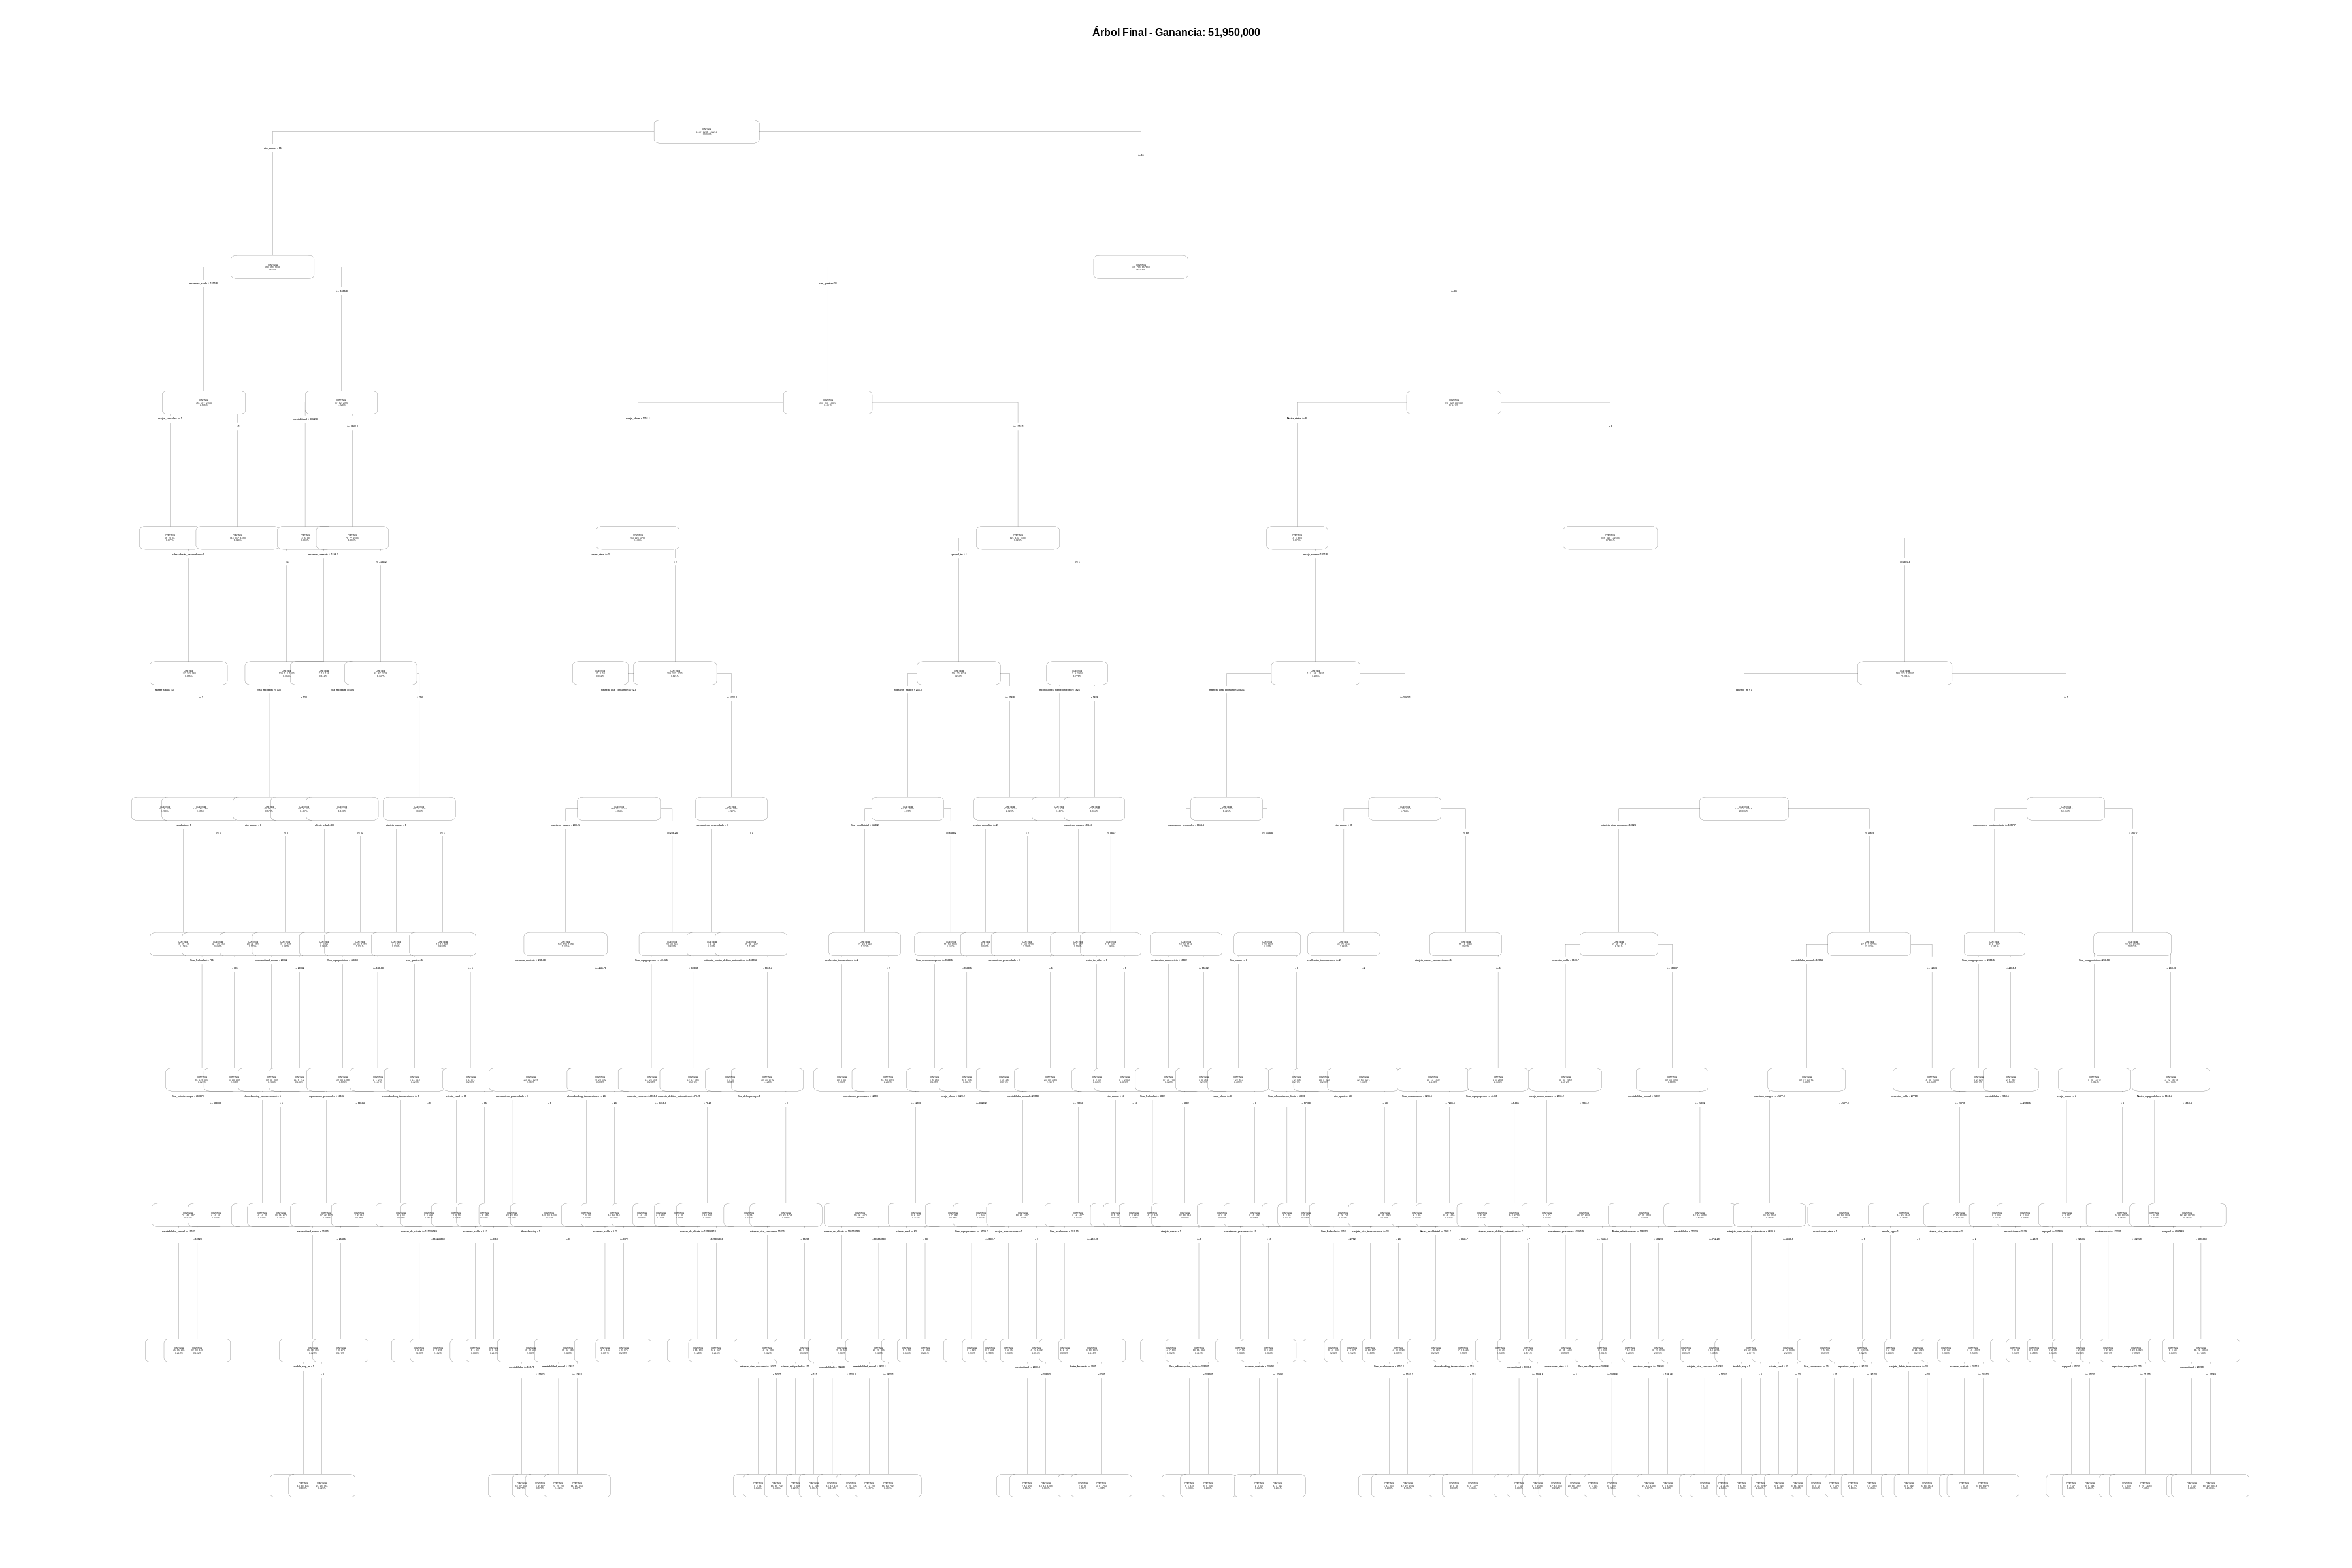

In [8]:
# VISUALIZACIÓN DEL ÁRBOL
# ============================================

# Grafico el árbol
options(repr.plot.width=30, repr.plot.height=20)

prp(modelo_final,
    extra = 101,
    digits = -5,
    branch = 1,
    type = 4,
    varlen = 0,
    faclen = 0,
    main = paste0("Árbol Final - Ganancia: ", format(mejor_config$ganancia_mean, big.mark=","))
)


In [9]:
# PREDICCIÓN EN DATASET FUTURO
# ============================================

# Dataset futuro (202109)
dfuture <- dataset[foto_mes == 202109]

cat("\n\nRegistros en dataset futuro:", nrow(dfuture), "\n")

# Aplico el modelo
prediccion <- predict(
    object = modelo_final,
    newdata = dfuture,
    type = "prob"
)

# Creo tabla de predicción
tb_prediccion <- as.data.table(list(
  "numero_de_cliente" = dfuture$numero_de_cliente,
  "prob" = prediccion[, "BAJA+2"]
))




Registros en dataset futuro: 165093 


In [10]:
# DECISIÓN DE ENVÍO
# ============================================

# Corte en 1/40 como indica el código original
tb_prediccion[, Predicted := prob > (1/40)]

cat("\nDistribución de predicciones:\n")
print(table(tb_prediccion$Predicted))
cat("\nClientes a los que se enviará estímulo:", sum(tb_prediccion$Predicted), "\n")
cat("Porcentaje:", round(100*mean(tb_prediccion$Predicted), 2), "%\n")



Distribución de predicciones:

 FALSE   TRUE 
154486  10607 

Clientes a los que se enviará estímulo: 10607 
Porcentaje: 6.42 %


In [ ]:
# GENERACIÓN DE ARCHIVO PARA KAGGLE
# ============================================

# Nombre del archivo con los hiperparámetros
archivo_kaggle <- paste0("K101_cp", abs(mejor_config$cp),
                         "_md", mejor_config$maxdepth,
                         "_ms", mejor_config$minsplit,
                         "_mb", mejor_config$minbucket, ".csv")

# Guardo el archivo
fwrite(tb_prediccion[, list(numero_de_cliente, Predicted)],
       file = archivo_kaggle,
       sep = ","
)

cat("\n============================================\n")
cat("ARCHIVO GENERADO:", archivo_kaggle, "\n")
cat("============================================\n\n")

# ============================================
# SUBMIT A KAGGLE
# ============================================

comando <- "kaggle competitions submit"
competencia <- "-c labo-i-2025-virtual-analista-sr"
arch <- paste("-f", archivo_kaggle)
mensaje <- paste0("-m 'MEJOR CONFIG - cp=", param_final$cp,
                  " minsplit=", param_final$minsplit,
                  " minbucket=", param_final$minbucket,
                  " maxdepth=", param_final$maxdepth,
                  " ganancia=", format(mejor_config$ganancia_mean, big.mark=","), "'")

linea <- paste(comando, competencia, arch, mensaje)

cat("Comando para Kaggle:\n")
cat(linea, "\n\n")

# Ejecuto el submit
cat("Enviando a Kaggle...\n")
salida <- system(linea, intern=TRUE)
cat(salida)

cat("\n\n============================================\n")
cat("¡LISTO! Revisa tu posición en Kaggle\n")
cat("Si quedas primero... ¡SELFIE TIME! 📸\n")
cat("============================================\n")